In [ ]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# TensorFlow Keras 라이브러리에서 MNIST 데이터셋을 불러오기
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋을 로드하여 훈련 데이터와 테스트 데이터로 분할
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련 데이터와 테스트 데이터를 255로 나누어 0과 1 사이의 값으로 스케일링
x_train, x_test = x_train / 255., x_test / 255.

# 훈련 데이터의 샘플 수를 변수에 저장
n_train = x_train.shape[0]

# 테스트 데이터의 샘플 수를 변수에 저장
n_test = x_test.shape[0]

# 훈련 데이터와 레이블의 형태, 첫 번째 레이블 값을 출력
print(x_train.shape, y_train.shape, y_train[0])

# 테스트 데이터와 레이블의 형태, 첫 번째 레이블 값을 출력
print(x_test.shape, y_test.shape, y_test[0])

(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

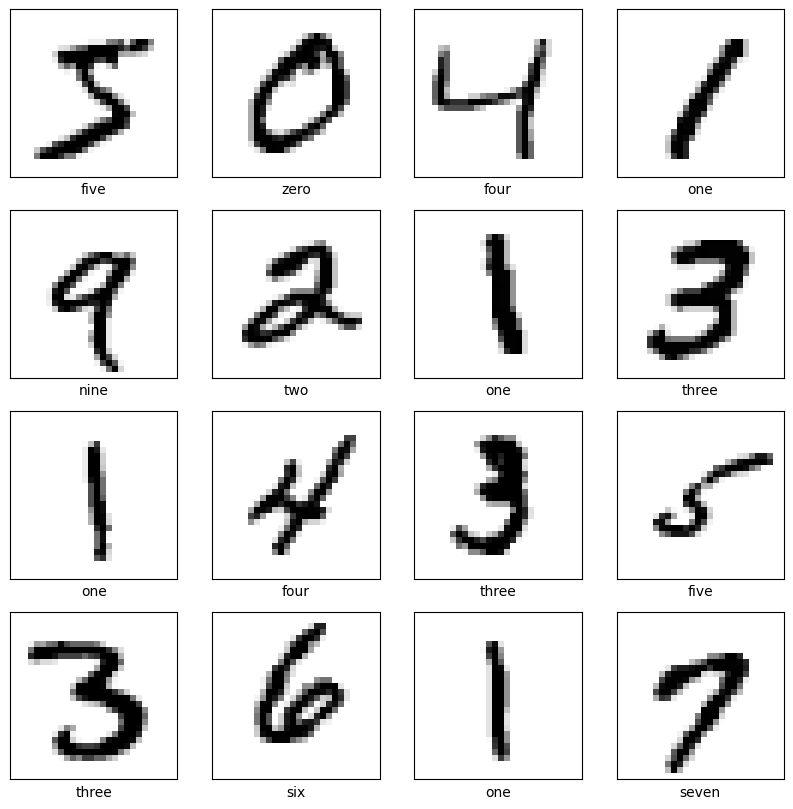

In [ ]:
# 숫자 클래스 이름을 리스트로 정의
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# 10x10 인치 크기의 새로운 그림을 생성
plt.figure(figsize=(10,10))

# 16개의 이미지를 그리기 위해 반복
for i in range(16):
  # 4x4 격자의 i+1번째 서브플롯을 생성
  plt.subplot(4, 4, i+1)

  # x축 눈금을 제거
  plt.xticks([])

  # y축 눈금을 제거
  plt.yticks([])

  # i번째 훈련 이미지 데이터를 img 변수에 저장
  img = x_train[i]

  # img를 이진(binary) 색상 맵을 사용하여 화면에 표시
  plt.imshow(img, cmap=plt.cm.binary)

  # 이미지 아래에 해당하는 클래스 이름을 레이블로 추가
  plt.xlabel(class_names[y_train[i]])

# 모든 서브플롯을 표시
plt.show()

In [ ]:
# Sequential 모델을 정의, 층을 순서대로 쌓음
model = tf.keras.models.Sequential([
    # 입력 데이터를 1차원 배열로 평탄화, 입력 크기는 28x28 픽셀 이미지
    tf.keras.layers.Flatten(input_shape=(28,28)),

    # 드롭아웃 레이어를 추가, 20%의 노드를 무작위로 드롭하여 과적합 방지
    tf.keras.layers.Dropout(0.2),

    # 10개의 뉴런을 가진 완전 연결(Dense) 레이어, 소프트맥스 활성화 함수로 클래스 확률 출력
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델을 컴파일, 옵티마이저, 손실 함수 및 평가 지표 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5125 - accuracy: 0.8597
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.9032
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3241 - accuracy: 0.9074
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3163 - accuracy: 0.9095
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.9115


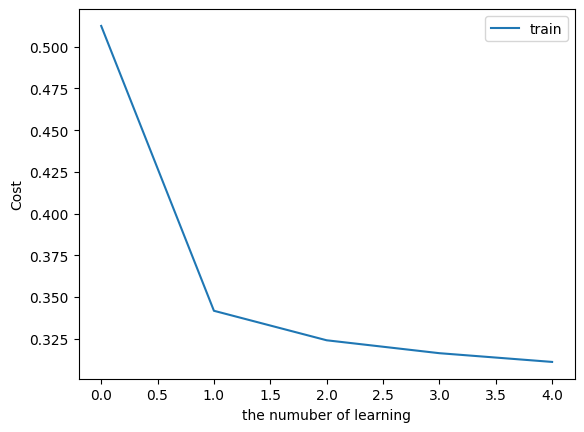

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.xlabel("the numuber of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 2.3584 - accuracy: 0.0892 - 588ms/epoch - 2ms/step


[2.3583970069885254, 0.08919999748468399]

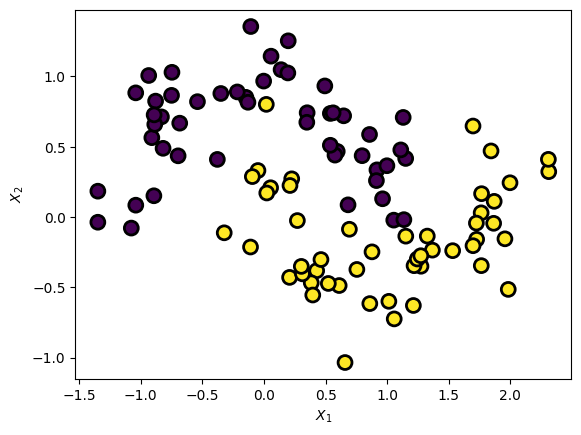

[[ 1.36698238 -0.23541584]
 [ 1.76404402 -0.34563288]
 [-0.37868174  0.41004375]
 [ 1.15113747 -0.13597622]
 [ 2.31168314  0.32295125]]
[1 1 0 1 1]


In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y=make_moons(n_samples = 100, noise=0.2, random_state = 1)

plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

print(X[0:5,:])
print(y[0:5])

In [ ]:
from pandas import DataFrame
from matplotlib import pyplot
df=DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,1.366982,-0.235416,1
1,1.764044,-0.345633,1
2,-0.378682,0.410044,0
3,1.151137,-0.135976,1
4,2.311683,0.322951,1


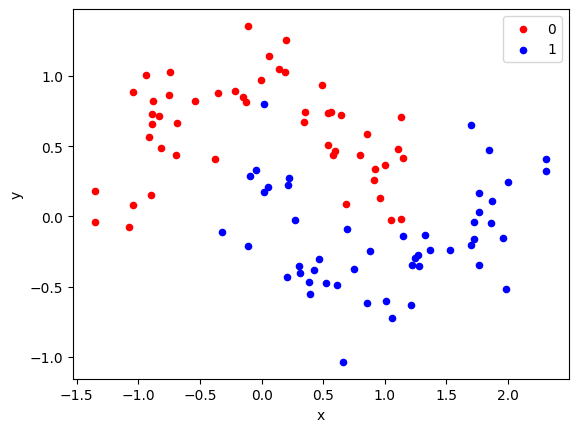

In [ ]:
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
n_train=30
trainX, testX = X[:n_train,:], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainy, validation_data =(testX, testy),
                    epochs=4000, verbose=0)

In [ ]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

Train acc: 1.000, Test acc: 0.914


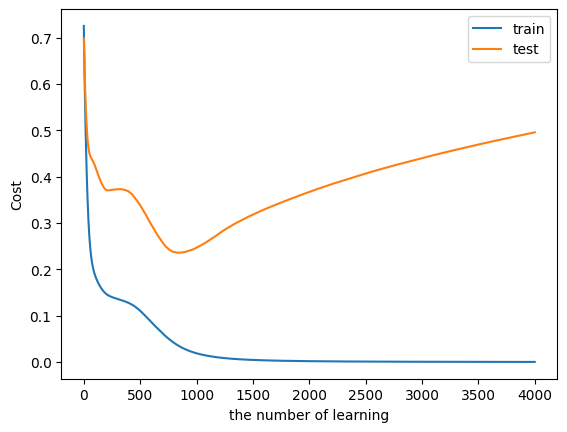

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel("the number of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy),
                    epochs=4000, verbose=0, callbacks=[es])

Epoch 217: early stopping


Train acc: 0.967, Test acc : 0.814


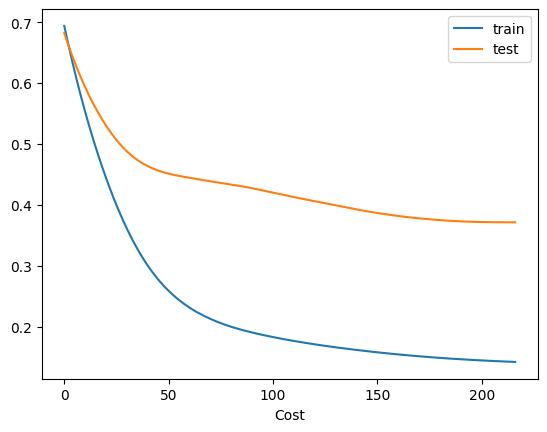

In [ ]:
_, train_acc= model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train acc: %.3f, Test acc : %.3f' %(train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel("Cost")
pyplot.legend()
pyplot.show()

In [ ]:
model=Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

Epoch 1019: early stopping
Train acc: 1.000, Test acc: 0.943


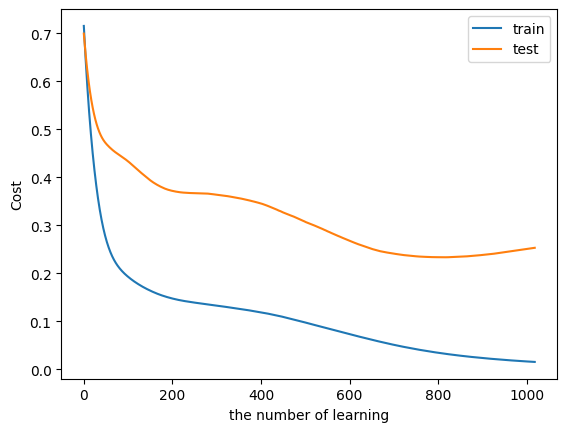

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy),
                    epochs=4000, verbose=0, callbacks=[es])

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train acc: %.3f, Test acc: %.3f' % (train_acc, test_acc))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel("the number of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

data preprocessing(전처리) : non-normalized inputs

In [107]:
import tensorflow as tf
import numpy as np
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999],
               [819.359985, 823,        1188100, 818.469971, 818.97998],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)


(8, 4) (8, 1)


In [108]:
# (2) hypothesis
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([4, 1], mean=0.0), name='weight')  # 초기화
b = tf.Variable(tf.random.normal([1], mean=0.0), name='bias')

def hypothesis(X):
    return tf.matmul(X, W) + b

# (3) cost function
def cost_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# (4) stochastic gradient descent algorithm to minimize cost function
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)


In [109]:
# training
for step in range(2001):

    with tf.GradientTape() as g:
        pred = hypothesis(x_data)
        cost = cost_fn(pred, y_data)

    # gradient 계산
        gradients = g.gradient(cost, [W, b])

    # gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))
    # zip([-0.57718, -0.28752], [W, b]) -> -0.57718 = W, -0.28752 = b

    if step % 500 == 0:
        # print("%s %d cost: %s" % (step, cost.numpy()))
        # print("step = {}, cost = {}, W = {}, b = {}".format(step+1, cost, W.numpy(), b.numpy()))
        print("step =", '%04d' % (step+1), "cost ={}, W ={}, b ={}". format(cost, W.numpy(), b.numpy()))

step = 0001 cost =4382490624000.0, W =[[-3.3485145e+06]
 [-3.3680360e+06]
 [-5.3900549e+09]
 [-3.3410470e+06]], b =[-4091.3438]
step = 0501 cost =nan, W =[[nan]
 [nan]
 [nan]
 [nan]], b =[nan]
step = 1001 cost =nan, W =[[nan]
 [nan]
 [nan]
 [nan]], b =[nan]
step = 1501 cost =nan, W =[[nan]
 [nan]
 [nan]
 [nan]], b =[nan]
step = 2001 cost =nan, W =[[nan]
 [nan]
 [nan]
 [nan]], b =[nan]


In [90]:
w_hat = W.numpy()
b_hat = b.numpy()
print('weights =\n', w_hat)
print('bias.   =\n', b_hat)

weights =
 [[nan]
 [nan]
 [nan]
 [nan]]
bias.   =
 [nan]


In [ ]:
import tensorflow as tf
import numpy as np

data preprocessing(전처리) : MinMax scaler

In [118]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


In [119]:
xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999],
               [819.359985, 823,        1188100, 818.469971, 818.97998],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)

In [120]:
# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)

[[1.         1.         0.         1.         1.        ]
 [0.70548487 0.70439553 1.         0.71881783 0.8375579 ]
 [0.5441255  0.50274825 0.57608694 0.606468   0.6606331 ]
 [0.33890355 0.31368026 0.10869565 0.45989135 0.4380092 ]
 [0.51436    0.4258239  0.3043478  0.5850481  0.42624405]
 [0.4955618  0.4258239  0.3152174  0.48131135 0.49276137]
 [0.11436066 0.         0.20652173 0.22007777 0.1859724 ]
 [0.         0.077471   0.5326087  0.         0.        ]]
(8, 4) (8, 1)


In [121]:
# training
for step in range(2001):

    with tf.GradientTape() as g:
        pred = hypothesis(x_data)
        cost = cost_fn(pred, y_data)

    # gradient 계산
        gradients = g.gradient(cost, [W, b])

    # gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))
    # zip([-0.57718, -0.28752], [W, b]) -> -0.57718 = W, -0.28752 = b
    if step % 5000 == 0:
        #print("%s %d cost: %s" % (step, cost.numpy()))
        #print("step = {}, cost = {}, W = {}, b = {}".format(step+1, cost, W.numpy(), b.numpy()))
        print("step =", '%04d' % (step+1), "cost ={}, W ={}, b ={}".format(cost, W.numpy(), b.numpy()))



ValueError: cannot convert float NaN to integer

#data preprocessing(전처리) standard scaler

In [102]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [103]:
def StandardScaler_(x):
    numerator = x - np.mean(x, axis=0)
    denominator = np.std(x, axis=0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [104]:


xy = np.array([[828.659973, 833.450012, 908100, 828.349976,  831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999],
               [819.359985, 823,        1188100, 818.469971, 818.97998],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# int -> float
xy = np.array(xy, dtype=np.float32)




In [105]:
# # xy_scaled = StandardScaler_(xy)
scaler = StandardScaler()
xy_scaled = scaler.fit_transform(xy)
print(xy_scaled)

x_data = xy_scaled[:, 0:-1]
y_data = xy_scaled[:, [-1]]
print(x_data.shape, y_data.shape)

[[ 1.8004487   1.8851336  -1.2823008   1.7278715   1.618899  ]
 [ 0.8109751   0.9053588   2.0883183   0.7384643   1.0874736 ]
 [ 0.2688607   0.23700316  0.65946895  0.34313437  0.50866824]
 [-0.42061728 -0.38965878 -0.91592914 -0.172631   -0.21964055]
 [ 0.1688586  -0.01796104 -0.25646016  0.26776302 -0.25812998]
 [ 0.10570277 -0.01796104 -0.21982299 -0.09725961 -0.04052008]
 [-1.1750072  -1.4293454  -0.58619463 -1.0164729  -1.044173  ]
 [-1.5592213  -1.1725694   0.5129203  -1.7908697  -1.6525773 ]]
(8, 4) (8, 1)


In [106]:
# training
for step in range(2001):

    with tf.GradientTape() as g:
        pred = hypothesis(x_data)
        cost = cost_fn(pred, y_data)

    # gradient 계산
        gradients = g.gradient(cost, [W, b])

    # gradients에 따라 W와 b 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))
    # zip([-0.57718, -0.28752], [W, b]) -> -0.57718 = W, -0.28752 = b

    if step % 5000 == 0:
        # print("%s %d cost: %s" % (step, cost.numpy()))
        # print("step = {}, cost = {}, W = {}, b = {}".format(step+1, cost, W.numpy(), b.numpy()))
        print("step =", '%04d' % (step+1), "cost ={}, W ={}, b ={}". format(cost, W.numpy(), b.numpy()))


step = 0001 cost =nan, W =[[nan]
 [nan]
 [nan]
 [nan]], b =[nan]
